In [1]:
import pandas as pd
import numpy as np

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('water_potability.csv')

In [4]:
df.shape

(3276, 10)

In [5]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df.fillna(df.mean(),inplace=True)

In [8]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [9]:
df.eq(0).sum()

ph                    1
Hardness              0
Solids                0
Chloramines           0
Sulfate               0
Conductivity          0
Organic_carbon        0
Trihalomethanes       0
Turbidity             0
Potability         1998
dtype: int64

In [10]:
df[["ph"]]=df[["ph"]].replace(0,np.NaN)
df.fillna(df.mean(),inplace=True)

In [11]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.076933,-0.077554,-0.031201,0.014454,0.020125,0.037266,0.004064,-0.034530,-0.004479
Hardness,0.076933,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.077554,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031201,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014454,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.020125,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.037266,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.004064,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.034530,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.004479,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


<Axes: >

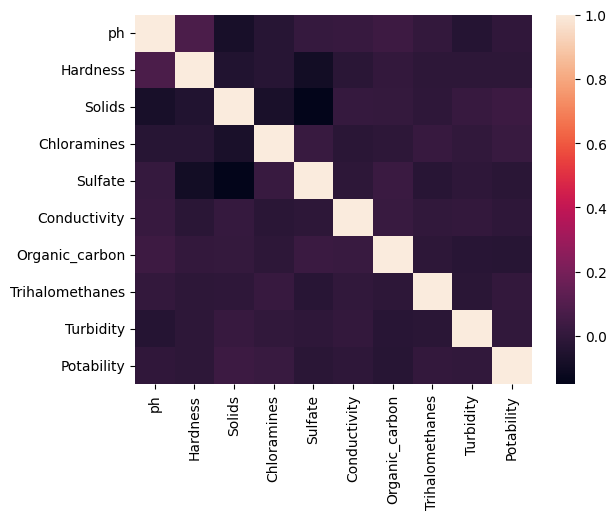

In [13]:
import seaborn as sns
sns.heatmap(df.corr())

In [23]:
df.corr().nlargest(5,'Potability').index

Index(['Potability', 'Solids', 'Chloramines', 'Trihalomethanes', 'Turbidity'], dtype='object')

In [33]:
Y=df.iloc[:,9]
X=df.drop(columns=['Potability'],axis=1)
#X=df[['Solids','Chloramines','Trihalomethanes','Turbidity']]

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

classifierKNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifierKA = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifierLG = LogisticRegression(random_state = 0)
classifierRF=RandomForestClassifier(n_estimators=100)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

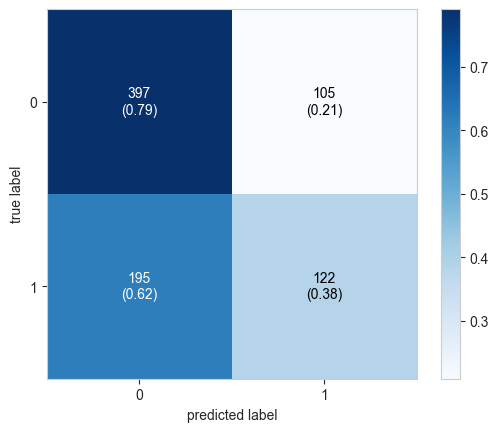

In [35]:
classifierKNN.fit(X_train,y_train)
y_predKNN=classifierKNN.predict(X_test)
# cmKNN = confusion_matrix(y_test, y_predKNN)
# print(cmKNN)
accuracy_scoreKNN=mt.accuracy_score(y_test,y_predKNN)

cmKNN = confusion_matrix(y_test,y_predKNN)
plot_confusion_matrix(conf_mat=cmKNN,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

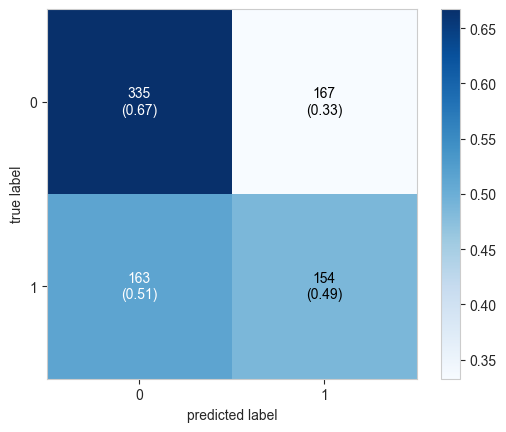

In [36]:
classifierKA.fit(X_train,y_train)
y_predKA=classifierKA.predict(X_test)
accuracy_scoreKA=mt.accuracy_score(y_test,y_predKA)

cmKA = confusion_matrix(y_test,y_predKA)
plot_confusion_matrix(conf_mat=cmKA,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

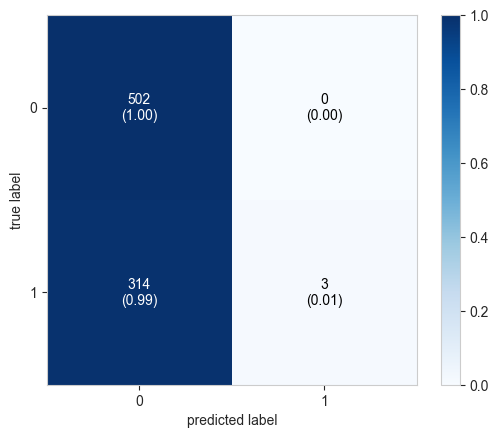

In [37]:
classifierLG.fit(X_train,y_train)
y_predLG=classifierLG.predict(X_test)
accuracy_scoreLG=mt.accuracy_score(y_test,y_predLG)

cmLG = confusion_matrix(y_test,y_predLG)
plot_confusion_matrix(conf_mat=cmLG,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

0.6336996336996337


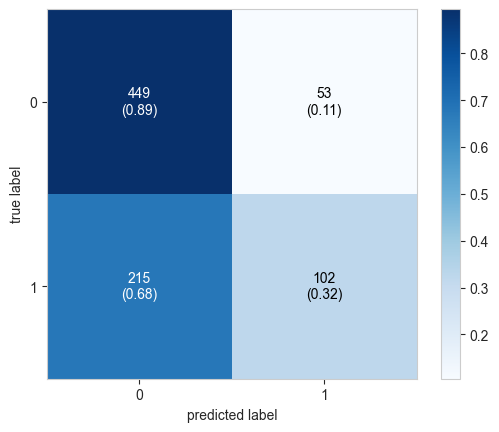

In [38]:
classifierRF.fit(X_train,y_train)
y_predRF=classifierRF.predict(X_test)
accuracy_scoreRF=mt.accuracy_score(y_test,y_predKNN)
print(accuracy_scoreRF)

cmRF = confusion_matrix(y_test,y_predRF)
plot_confusion_matrix(conf_mat=cmRF,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [39]:
accuracies = {}
accuracies['K En Yakın Komşu']=accuracy_scoreKNN
accuracies['Karar Ağacı']=accuracy_scoreKA
accuracies['Lojistik Regresyon']=accuracy_scoreLG
accuracies['Rasgele Orman']=accuracy_scoreRF

C:\Users\erolc\AppData\Local\Temp\ipykernel_14284\1604339365.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)


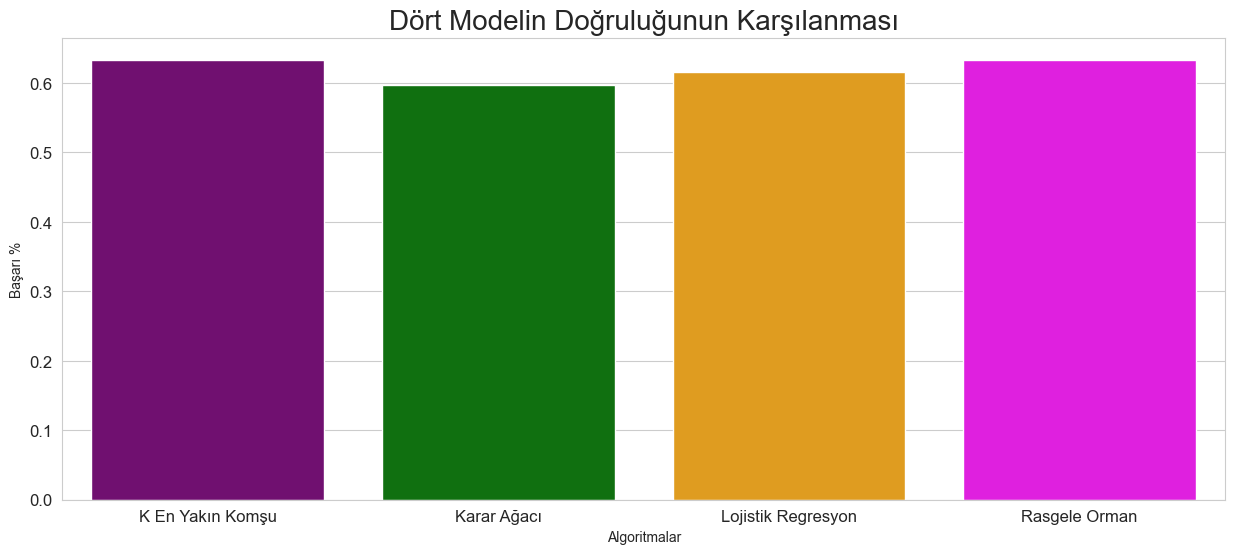

In [40]:
import seaborn as sns
colors = ["purple", "green", "orange", "magenta"]
plt.figure(figsize = (15,6))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.title('Dört Modelin Doğruluğunun Karşılanması', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("Başarı %")
plt.xlabel("Algoritmalar")


plt.show()

In [41]:
df_accuracy = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])
df_accuracy.sort_values(by= ['Accuracy'], inplace= True, ascending= False)
df_accuracy

,Model,Accuracy
0,K En Yakın Komşu,0.633700
3,Rasgele Orman,0.633700
2,Lojistik Regresyon,0.616606
1,Karar Ağacı,0.597070


In [42]:
import pickle
filename='KNNModel.sav'
pickle.dump(classifierLG,open(filename,'wb'))
pickle.dump(sc,open("sc.sav","wb"))